The American put option price at S0 = 35 is approximately: 6.4093


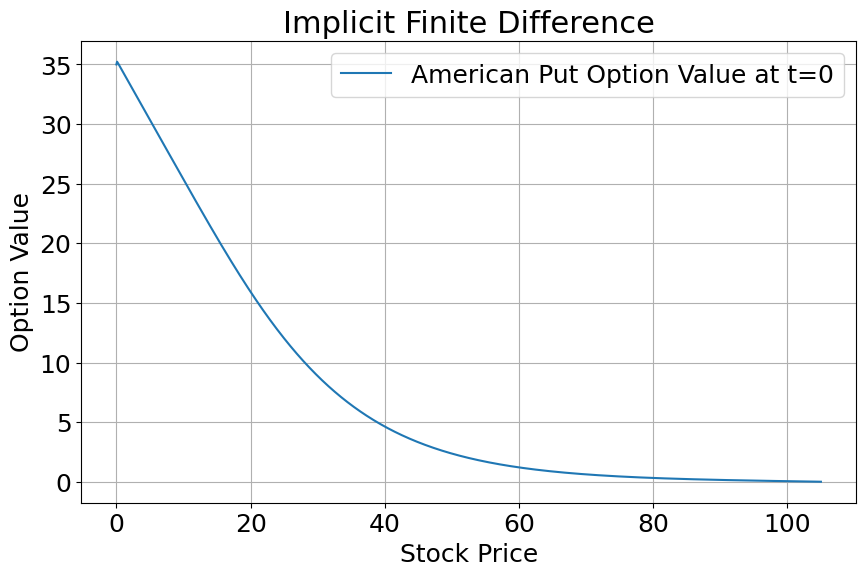

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Parameters
S0 = 35
K = 35
T = 1
r = 0.03
q = 0.04
sigma = 0.45

S_max = 3 * S0  # Stock price upper bound
M = 1000         # Number of stock price steps
N = 1000         # Number of time steps


# Discretisation
dS = S_max / M  # Stock price increment
dt = T / N      # Time increment


# Grid initialisation
stock_prices = np.linspace(0, S_max, M + 1)
option_values = np.zeros((M + 1, N + 1))        # 2D array for option values


# Boundary conditions at maturity
# American put payoff at maturity = max(K - S, 0)
option_values[:, -1] = np.maximum(K - stock_prices, 0)


# Coefficient initialisation
j = np.arange(1, M)     # Index for internal nodes


# Coefficients for implicit method
alpha = 0.5 * dt * ((r - q) * j - (sigma**2) * j**2)
beta = 1 + dt * (sigma**2 * j**2 + (r - q)) 
gamma = -0.5 * dt * ((r - q) * j + (sigma**2) * j**2)


# Prepare vectors for the tridiagonal matrix
a = np.zeros(M - 1)     # Lower diagonal (alpha)
b = np.zeros(M - 1)     # Main diagonal (beta)
c = np.zeros(M - 1)     # Upper diagonal (gamma)
d = np.zeros(M - 1)     # Right-hand side vector (option_values)


# Backward induction using the implicit method
for n in range(N-1, -1, -1):

    # Fill the coefficients a, b, c, & d
    for i in range(1, M):
        a[i - 1] = alpha[i - 1]
        b[i - 1] = beta[i - 1]
        c[i - 1] = gamma[i - 1]
        d[i - 1] = option_values[i, n + 1]

    # Adjust the boundary conditions at each time step
    d[0] -= a[0] * K        # Adjust for lower boundary
    d[-1] -= c[-1] * 0      # Adjust for upper boundary
        
    # Solve the tridiagonal system using numpy's built-in solver
    option_values[1:M, n]  = np.linalg.solve(
        np.diag(b) + np.diag(a[1:], -1) + np.diag(c[:-1], 1), d)
    
    # Early exercise condition for American option
    option_values[1:M, n] = np.maximum(
        option_values[1:M, n], K - stock_prices[1:M])

    # Boundary conditions for stock price extremes
    option_values[0, n] = K     # When stock price is 0, option value is K
    option_values[M, n] = 0     # When stock price is very high, option value is 0


# Extract the option price for the initial stock price, S0
initial_price_index = np.searchsorted(stock_prices, S0)
american_put_price = option_values[initial_price_index, 0]
print(f"The American put option price at S0 = {S0} is approximately: {american_put_price:.4f}")


# Plotting teh option price as a function of stock price at the initial time t = 0
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, option_values[:, 0], label='American Put Option Value at t=0')
plt.xlabel('Stock Price', fontsize=18)
plt.ylabel('Option Value', fontsize=18)
plt.title('Implicit Finite Difference', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize=18)
plt.grid(True)
plt.show()

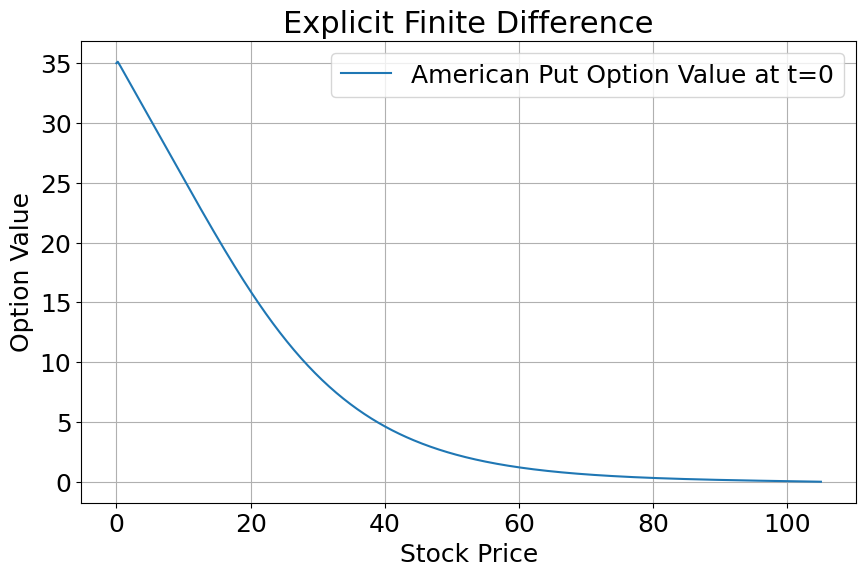

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file
file_path = 'option_values.csv'  
data = pd.read_csv(file_path)

x = data.iloc[:, 0]  
y = data.iloc[:, 1]  

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='American Put Option Value at t=0')
plt.xlabel('Stock Price', fontsize=18)  
plt.ylabel('Option Value', fontsize=18) 
plt.title('Explicit Finite Difference', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize=18)
plt.grid(True)
plt.show()
